## Importing Libraries datasets 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sb

In [2]:
data = pd.read_csv("breast-cancer-wisconsin.data")

x = data.iloc[0:, 1:-1].values
y = data.iloc[0:, -1].values
data.head()

,id,clump_thickness,unifomity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bare_nucleoli,bland_chromation,normal_nucleoli,mitose,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data Visualising 

In [3]:
#correlation matrix
data_corr = data.corr()
drop = ['id']
data_corr.drop(drop, inplace = True)
data_corr.drop(drop, axis = 1, inplace = True)
data_corr

,clump_thickness,unifomity_cell_size,uniformity_cell_shape,marginal_adhesion,single_e_cell_size,bland_chromation,normal_nucleoli,mitose,class
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
unifomity_cell_size,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
uniformity_cell_shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
marginal_adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
single_e_cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromation,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitose,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
class,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


<ipython-input-4-97672a467790>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data_corr, dtype = np.bool))


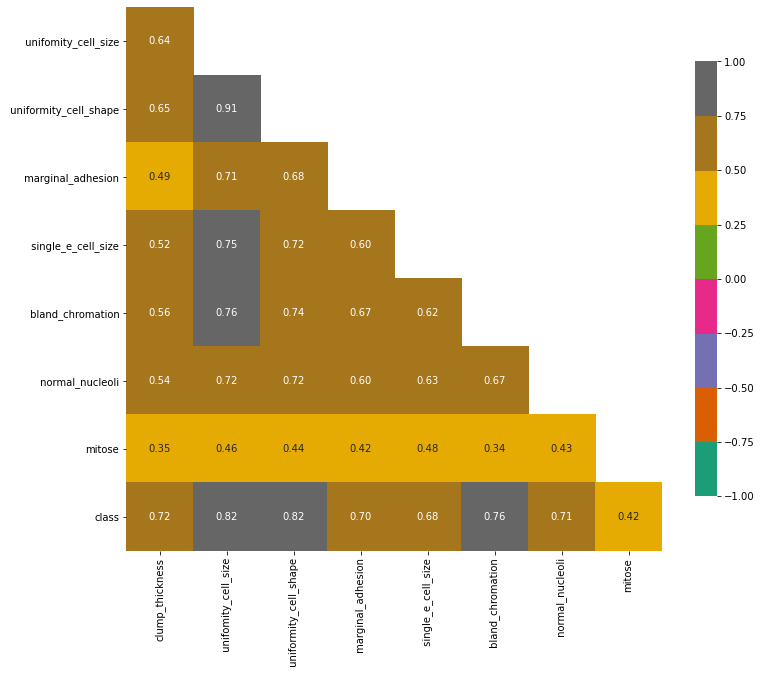

In [4]:
fig, ax = plt.subplots(figsize = (12, 10))
mask = np.triu(np.ones_like(data_corr, dtype = np.bool))
mask = mask[1:, :-1]
corr = data_corr.iloc[1:, :-1].copy()
sb.heatmap(corr, mask = mask, annot = True, fmt = ".2f", cmap = "Dark2", 
          vmin = -1, vmax = 1, cbar_kws = {"shrink": 0.8})
plt.yticks(rotation=0)
plt.show()

## Data Preprocessing

In [5]:
x[:, 5]

array(['1', '10', '2', '4', '1', '10', '10', '1', '1', '1', '1', '1', '3',
       '3', '9', '1', '1', '1', '10', '1', '10', '7', '1', '?', '1', '7',
       '1', '1', '1', '1', '1', '1', '5', '1', '1', '1', '1', '1', '10',
       '7', '?', '3', '10', '1', '1', '1', '9', '1', '1', '8', '3', '4',
       '5', '8', '8', '5', '6', '1', '10', '2', '3', '2', '8', '2', '1',
       '2', '1', '10', '9', '1', '1', '2', '1', '10', '4', '2', '1', '1',
       '3', '1', '1', '1', '1', '2', '9', '4', '8', '10', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '6', '10', '5', '5', '1', '3',
       '1', '3', '10', '10', '1', '9', '2', '9', '10', '8', '3', '5', '2',
       '10', '3', '2', '1', '2', '10', '10', '7', '1', '10', '1', '10',
       '1', '1', '1', '10', '1', '1', '2', '1', '1', '1', '?', '1', '1',
       '5', '5', '1', '?', '8', '2', '1', '10', '1', '10', '5', '3', '1',
       '10', '1', '1', '?', '10', '10', '1', '1', '3', '?', '2', '10',
       '1', '1', '1', '1', '1', '1', '10', '10'

In [6]:
imputer = SimpleImputer(missing_values = '?', strategy = 'constant', fill_value = 2)
imputer.fit(x[:, 5:6])
x[:, 5:6] = imputer.transform(x[:, 5:6])
x = x.astype(int)
print(x[:,5])

[ 1 10  2  4  1 10 10  1  1  1  1  1  3  3  9  1  1  1 10  1 10  7  1  2
  1  7  1  1  1  1  1  1  5  1  1  1  1  1 10  7  2  3 10  1  1  1  9  1
  1  8  3  4  5  8  8  5  6  1 10  2  3  2  8  2  1  2  1 10  9  1  1  2
  1 10  4  2  1  1  3  1  1  1  1  2  9  4  8 10  1  1  1  1  1  1  1  1
  1  1  6 10  5  5  1  3  1  3 10 10  1  9  2  9 10  8  3  5  2 10  3  2
  1  2 10 10  7  1 10  1 10  1  1  1 10  1  1  2  1  1  1  2  1  1  5  5
  1  2  8  2  1 10  1 10  5  3  1 10  1  1  2 10 10  1  1  3  2  2 10  1
  1  1  1  1  1 10 10 10  1  1  1 10  1  1  1 10 10  1  8 10  8  1  8 10
  1  1  1  1  7  1  1  1 10 10  1  1  1 10  5  1  1  1 10  8  1 10 10  5
  1  1  4  1  1 10  5  8 10  1 10  5  1 10  7  8  1 10  1  2 10  2  9 10
  2  1  1  5  1  2 10  9  1  2  1 10 10 10  8 10  1  1  1  8 10 10 10 10
  3  1 10 10  4  1 10  1 10  4  1  2  1  1  1  7  1  1 10 10 10 10 10  1
  5 10  1  1  2 10  2 10  5  2  1 10  4  1 10  1 10 10  1  1  3  5  1  1
  1  1  1  2 10  8  1  5 10  2  1 10  1  1 10  1  4

## Splitting Data into Test set and Training set 

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)


## FeatureScaling 

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


## LazyPredict 

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose = 0, ignore_warnings = True)
models, prediction = clf.fit(x_train, x_test, y_train, y_test)
models

## Training Model 

In [27]:
from sklearn.svm import LinearSVC
classifier = LinearSVC(penalty = 'l2', dual = False, loss = 'squared_hinge')
classifier.fit(x_train, y_train)

LinearSVC(dual=False)

## Predecting TestSet Result 

In [29]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[2 2]
 [2 2]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 4]
 [4 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]

## Making Confusion Matrix 

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

[[109   3]
 [  3  60]]
0.9657142857142857
